In [1]:
# Function to train the model based on height distributions of males and females
uvtrain <- function(hm, hf) {
  hmin_m <- min(hm) - 15
  hmax_m <- max(hm) + 15
  hmin_f <- min(hf) - 15
  hmax_f <- max(hf) + 15

  mm <- mean(hm)  # Mean of male heights
  vm <- var(hm)   # Variance of male heights
  cat("Mean of Male Height:", mm, "\n")
  cat("Variance of Male Height:", vm, "\n")

  mf <- mean(hf)  # Mean of female heights
  vf <- var(hf)   # Variance of female heights
  cat("Mean of Female Height:", mf, "\n")
  cat("Variance of Female Height:", vf, "\n")

  # Generate height ranges
  hmm <- hmin_m:hmax_m
  hff <- hmin_f:hmax_f

  # Use dnorm() to compute probabilities
  pmh <- dnorm(hmm, mean = mm, sd = sqrt(vm))
  pfh <- dnorm(hff, mean = mf, sd = sqrt(vf))

  # Plot the normal densities
  plot(hmm, pmh, type = "l", col = "red", lwd = 2, 
       xlim = c(min(hff), max(hmm)), 
       xlab = "Height of Person (Male and Female)", 
       ylab = "P(male | height) and P(female | height)", 
       main = "Normal Density Distribution")
  lines(hff, pfh, col = "blue", lwd = 2)
  legend("topright", legend = c("Male", "Female"), col = c("red", "blue"), lty = 1, lwd = 2)
  
return(c(mm,vm,mf,vf)) 
}

In [2]:
# Bayes Rule Testing Function Using Normal Density
uvtest <- function(mm, vm, mf, vf, ht) {
  # Probability of Male given Height using dnorm()
  pm <- dnorm(ht, mean = mm, sd = sqrt(vm))
  
  # Probability of Female given Height using dnorm()
  pf <- dnorm(ht, mean = mf, sd = sqrt(vf))
  
  if (pm > pf) {
    print("The given Height of the Person is Male")
  } else {
    print("The given Height of the Person is Female")
  }
}

Mean of Male Height: 165.9 
Variance of Male Height: 80.98889 
Mean of Female Height: 149.5 
Variance of Female Height: 90.72222 


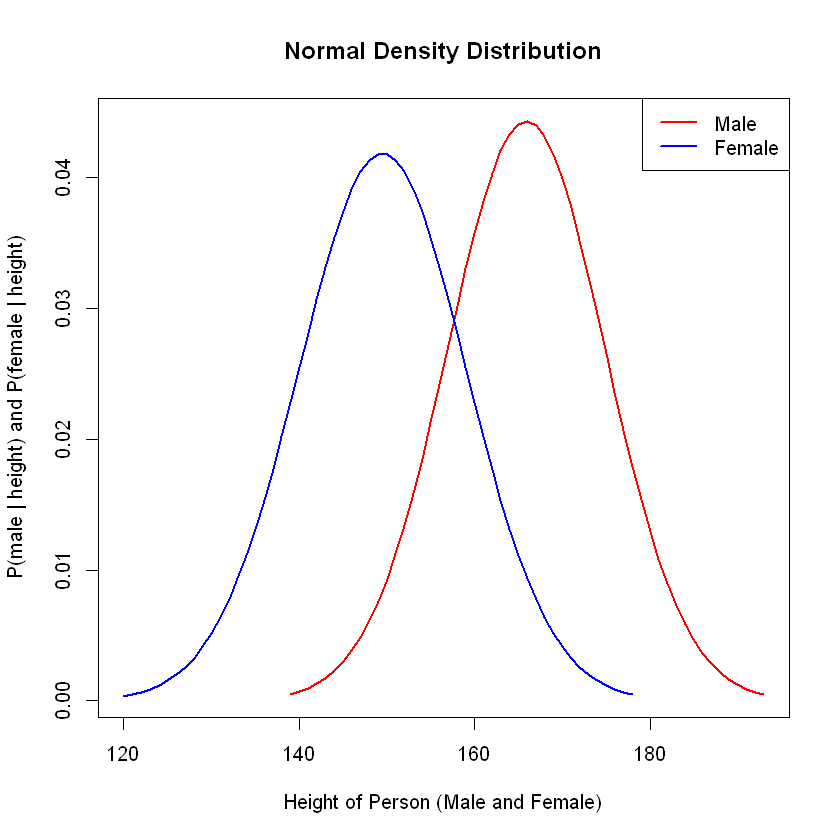

In [3]:
# Train Function Call
hm <- c(165, 170, 160, 154, 175, 155, 167, 177, 158, 178)
hf <- c(140, 145, 149, 152, 157, 135, 139, 160, 155, 163)
mv <- uvtrain(hm, hf)

In [4]:
# Testing Function Call
ht <- as.numeric(readline(prompt = 'Enter the height of the person for prediction: '))
mm <- mv[1]
vm <- mv[2]
mf <- mv[3]
vf <- mv[4]
uvtest(mm, vm, mf, vf, ht)

[1] "The given Height of the Person is Male"
